In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [18]:
students= pd.read_csv('students.csv')

In order to showcase the $\chi^2$ goodness-of-fit test we examine if the religion is equally distributed among students compared to the distribution of the religion among the population of the European Union. The religious demography of Europe is given below.

In [5]:
demography= pd.DataFrame([{'Catholic': 48,'Non believer/Agnostic': 16,'Protestant': 12,
                 'Orthodox': 8,'Atheist': 7,'Other Christian': 4,
                 'Other religion/None stated': 3, 'Muslim': 2}])
demography

,Catholic,Non believer/Agnostic,Protestant,Orthodox,Atheist,Other Christian,Other religion/None stated,Muslim
0,48,16,12,8,7,4,3,2


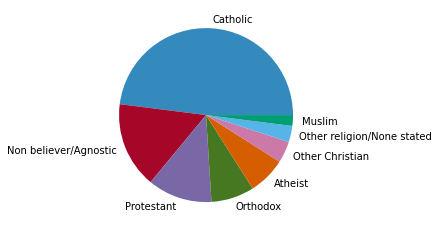

In [16]:
plt.pie(demography.values[0], labels= demography.columns);

In [19]:
# Checking all different religions of the students
students_religion= students.religion.unique()
students_religion

array(['Muslim', 'Other', 'Protestant', 'Catholic', 'Orthodox'],
      dtype=object)

Only five religion are present i the data set. Therefore we need to transform the European religious demography data.

In [27]:
new_demography= pd.Series(data= [48, 2, 8, np.sum([16, 7, 4, 3]),  12], index= ["Catholic", "Muslim", "Orthodox", "Other", "Protestant"])
new_demography

Catholic      48
Muslim         2
Orthodox       8
Other         30
Protestant    12
dtype: int64

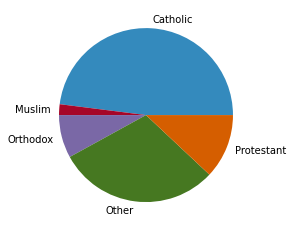

In [28]:
plt.pie(new_demography.values, labels= new_demography.index);

In [29]:
#Relative Frequency
relative_freq= new_demography/ 100
relative_freq

Catholic      0.48
Muslim        0.02
Orthodox      0.08
Other         0.30
Protestant    0.12
dtype: float64

In [30]:
n= 256
indices= np.random.choice(np.arange(0, len(students)), n)
sample1= students.religion.iloc[indices]

In [38]:
sample= sample1.value_counts().sort_index()
observed_freq= sample
observed_freq

Catholic      83
Muslim        15
Orthodox      16
Other         89
Protestant    53
Name: religion, dtype: int64

In [39]:
# expected Frequencis
expected_freq= n*relative_freq
expected_freq

Catholic      122.88
Muslim          5.12
Orthodox       20.48
Other          76.80
Protestant     30.72
dtype: float64

Now we are ready for hypothesis testing. The question was is the religion equally distributed among students compared to the distribution of the religion among the population of the European Union.

# Hypothesis Formation
$H_0:$ The variables has specified distribution.<br>
$H_a:$ The variables donot have specified distribution<br>
$\alpha=0.01$

In [40]:
chi2= np.sum((observed_freq- expected_freq)**2/ expected_freq)
chi2

51.08496093749999

In [42]:
df= len(sample)-1
df

4

In [44]:
p= 1- stats.chi2.cdf(chi2, df)
p

2.142808153138276e-10

p<< alpha. Therefore reject Null hypothesis.